In [1]:
import pandas as pd
import numpy as np
import datetime
from getting_started import *
import detect_duplicates_script as script_dd
import get_final_dataset as script_fds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_final = script_fds.get_final_ds(df_patient, df_pcr, './data_post_codes.csv')
# les trois premières lignes de notre dataset final
df_final[:3]

,patient_id,pcr,postcode,state,date_of_birth,age
0,653091,0,4514.0,QLD,1973-04-26,47.0
1,347667,0,4551.0,QLD,1990-03-16,30.0
2,708481,1,3199.0,VIC,1943-03-17,77.0


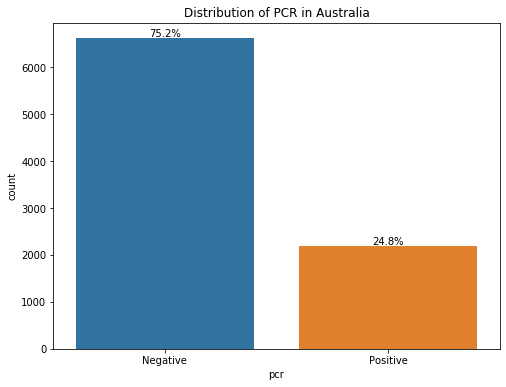

In [3]:
plt.figure(figsize=(8,6))

plt.title('Distribution of PCR in Australia')
plt.xlabel('pcr')
plt.ylabel('Count')

df_final_pcr = df_final[['pcr']]
ncount = len(df_final_pcr)
labels = ['Negative', 'Positive']
ax = sns.countplot(x="pcr", data=df_final_pcr)
ax.set_xticklabels(labels, rotation='horizontal', fontsize=10)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
#
######################################################################
### Commentaire: 
# Dans la représentation graphique (diagramme en barres) ci-dessous 
# on visualise le pourcentage de tests postifs parmi la population testées 
# en Australie 

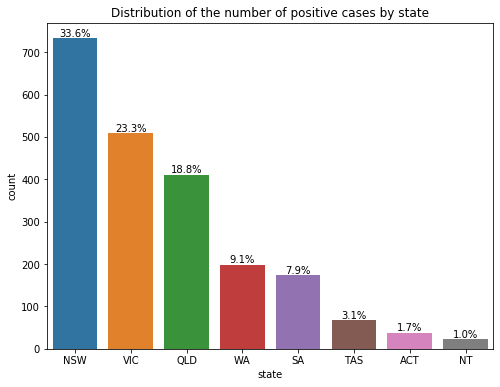

In [4]:
plt.figure(figsize=(8,6))

plt.title('Distribution of the number of positive cases by state')
plt.xlabel('pcr')
plt.ylabel('Count')

df_positive_state = df_final[['state']][df_final['pcr'] == 1]
ncount = len(df_positive_state)

ax = sns.countplot(x="state", 
                   data=df_positive_state,
                   order = df_positive_state['state'].value_counts().index)
#ax.set_xticklabels(labels, rotation='horizontal', fontsize=10)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
#
######################################################################
### Commentaire:
# On se focalise ici sur la classe des patients positifs au test du Covid19
# New South Wales est la région la plus touchée en Austrlie, selon les données dont on dispose.
# Northern Territory est la région la moins touchée.

In [5]:
#plt.figure(figsize=(12,8))

#plt.title('Distribution of PCR in Australia s states')
#plt.xlabel('pcr')
#plt.ylabel('Count')

#df_count_state_pcr = df_final[['state', 'pcr']]
#df_count_state_pcr['pcr'].replace(to_replace =0, 
                          #        value ="Negative",
                           #      inplace=True) 
#df_count_state_pcr['pcr'].replace(to_replace = 1, 
                              #    value ="Positive",
                               #  inplace=True) 

#ax = sns.countplot(x="state", hue="pcr", data=df_count_state_pcr)
#total = len(df_count_state_pcr)
#for p in ax.patches:
#    percentage = f'{100 * p.get_height() / total:.1f}%\n'
#    x = p.get_x() + p.get_width() / 2
#    y = p.get_height()
#    ax.annotate(percentage, (x, y), ha='center', va='center')

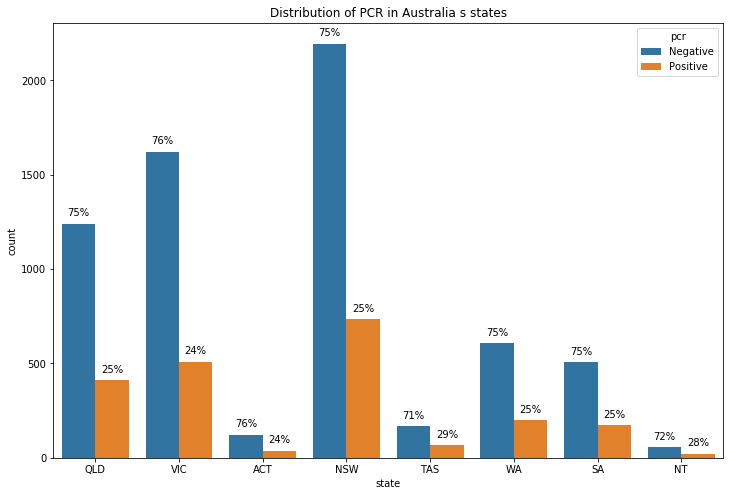

In [6]:
plt.figure(figsize=(12,8))

plt.title('Distribution of PCR in Australia s states')
plt.xlabel('pcr')
plt.ylabel('Count')

df_state_pcr = df_final[['state', 'pcr']]
df_count_state_pcr = df_state_pcr.copy()
df_count_state_pcr['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_count_state_pcr['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True) 

ax = sns.countplot(x="state", 
                   hue="pcr", 
                   #order = df_count_state_pcr['state'].value_counts().index,
                   data=df_count_state_pcr)

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
#
######################################################################
### Commentaire:
# Pour approfondir notre analyse, on affiche ici:
# le pourcentage que représente le nombre de cas positifs au niveau de chaque région.
# On remaque, que l'ile de Tasmania contient le taux de contamination le plus de élevé, avec 29%.

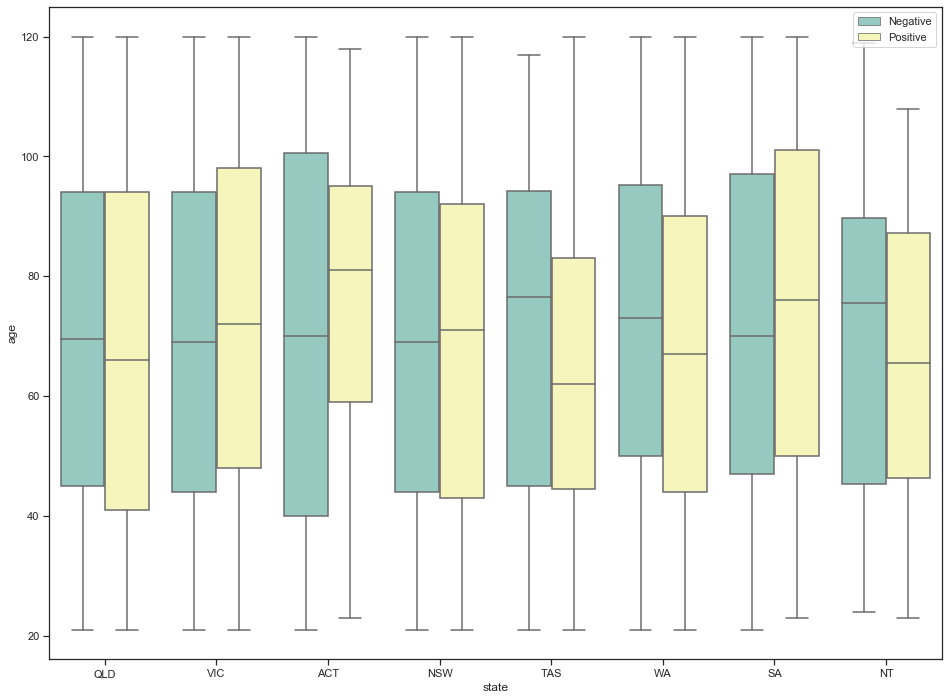

In [18]:
plt.figure(figsize=(16,12))

df_age_state = df_final[['age', 'state', 'pcr']]
df_age_state_box = df_age_state.copy()
df_age_state_box['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_age_state_box['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True) 

ax = sns.boxplot(x="state", y="age", hue="pcr",
                 data=df_age_state_box, palette="Set3")

plt.legend(loc='upper right')
#
######################################################################
### Commentaire:
# Pour comprendre la concentration des cas postifs au Covid19 vis à vis des classes d'ages,
# nous utilisons dans un premier temps la représentation graphique en boites à moustaches.
# On remarque :
# un quart de la population contaminés est agée entre 21 et ~43 ans
# les trois quarts de la population porteurs du Virus sont agés entre ~43 et 120

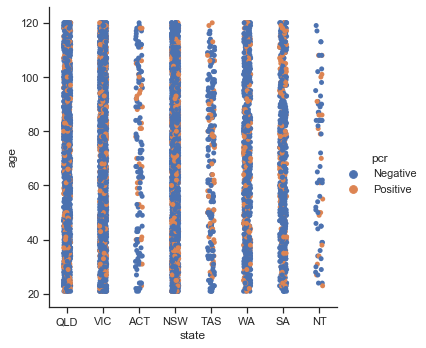

In [19]:
import seaborn as sns_cp
#import matplotlib.pyplot as plt

df_age_state_pcr = df_final[['age', 'state', 'pcr']]
df_age_state_pcr_cp = df_age_state_pcr.copy()
df_age_state_pcr_cp['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_age_state_pcr_cp['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True)
#df_age_state_pos = df_age_state[df_age_state["pcr"] == 1]

sns_cp.set(style="ticks", 
           color_codes=True)
#a = sns.load_dataset("tips")
sns_cp.catplot(x="state", 
               y="age",
               hue="pcr",
               data=df_age_state_pcr_cp);
#
######################################################################
### Commentaire:
# Le graphique suivant permet de montrer les concentrations d'ages 
# des personnes contaminées par le Covid19 

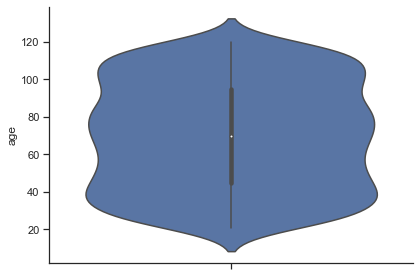

In [9]:
df_age_state = df_final[['age', 'state', 'pcr']]
df_age_state_pos = df_age_state[df_age_state["pcr"] == 1]
sns.catplot(y='age', 
            data=df_age_state_pos,
            height=4,aspect=1.5,
            kind='violin')
#
######################################################################
### Commentaire:
#

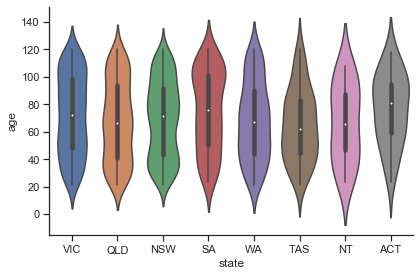

In [10]:
df_age_state = df_final[['age', 'state', 'pcr']]
df_age_state_pos = df_age_state[df_age_state["pcr"] == 1]
sns.catplot(x='state', 
            y='age', 
            data=df_age_state_pos,
            height=4,aspect=1.5,
            kind='violin')

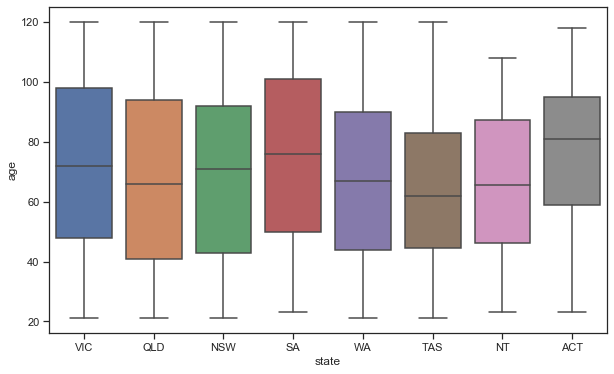

In [11]:
#plt.figure(figsize=(12,8))

#plt.title('Distribution of PCR in Australia s states')
#plt.xlabel('pcr')
#plt.ylabel('Count')
plt.figure(figsize=(10,6))

df_pos_age_state = df_final[['age', 'state']][df_final['pcr'] == 1]
ax = sns.boxplot(x="state", y="age", data=df_pos_age_state)

In [13]:
# Catégorie d'age
df_age_pcr = df_final[['age', 'pcr']]
df_age_pcr = df_age_pcr[df_age_pcr['age'].notnull()]
df_age_category_pcr = df_age_pcr.copy()
df_age_category_pcr['age_category'] = 'a'

#cond_ch = df_age_category_pcr['age'] <= 14
#df_age_category_pcr.loc[cond_ch, 'age_category'] = "childhood"

cond_ad = (df_age_category_pcr['age'] > 14) & (df_age_category_pcr['age'] <= 24)
df_age_category_pcr.loc[cond_ad, 'age_category'] = "adolescence"

cond_ya = (df_age_category_pcr['age'] > 24) & (df_age_category_pcr['age'] <= 35)
df_age_category_pcr.loc[cond_ya, 'age_category'] = "young adults" 

cond_maa = (df_age_category_pcr['age'] > 35) & (df_age_category_pcr['age']<=55)
df_age_category_pcr.loc[cond_maa, 'age_category'] = "middle-aged adults" 

cond_oad = (df_age_category_pcr['age'] > 55) & (df_age_category_pcr['age'] <= 64)
df_age_category_pcr.loc[cond_oad, 'age_category'] = "older adults"

cond_oa = df_age_category_pcr['age'] > 64
df_age_category_pcr.loc[cond_oa, 'age_category'] = "old age"
#

,age,pcr,age_category


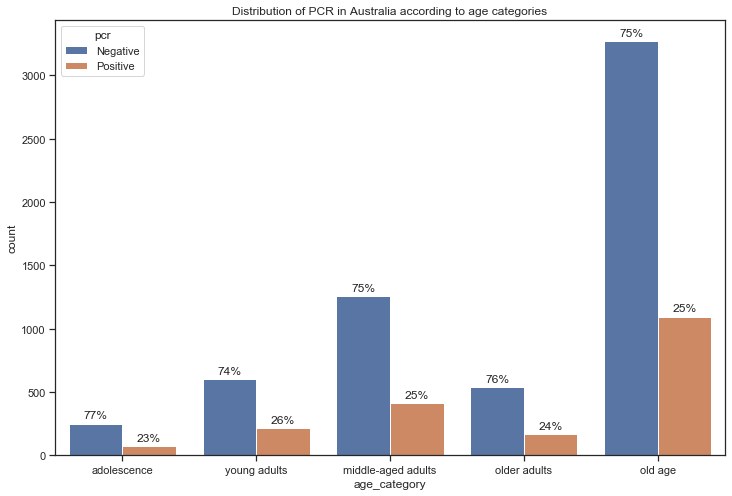

In [16]:
plt.figure(figsize=(12,8))

plt.title('Distribution of PCR in Australia according to age categories')
plt.xlabel('age category')
plt.ylabel('Count')

df_age_category_pcr_cp = df_age_category_pcr.copy()

df_age_category_pcr_cp['pcr'].replace(to_replace =0, 
                                  value ="Negative",
                                 inplace=True) 
df_age_category_pcr_cp['pcr'].replace(to_replace = 1, 
                                  value ="Positive",
                                 inplace=True) 

ax = sns.countplot(x="age_category", 
                   hue="pcr", 
                   order = ['adolescence', 'young adults', 'middle-aged adults', 'older adults', 'old age'],
                   data=df_age_category_pcr_cp)

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

In [ ]:
#df_final_pcr = df_final[['pcr']]

#labels = ['Negative', 'Positive'];
#graph = sns.catplot(x="pcr", 
 #           kind="count",
            #palette="ch:.25", 
 #           data=df_final_pcr)
#graph.set_axis_labels("PCR", "Count")
#graph.set_xticklabels(labels, rotation='horizontal', fontsize=10)

#graph
# Ajouter pourcentage !
#df_final_pcr[:10]

In [ ]:
#df_final_state = df_final[['state']][df_final['pcr'] == 1]

#labels = ['Negative', 'Positive'];
#graph = sns.catplot(x="state", 
 #           kind="count",
  #          #palette="ch:.25", 
   #         data=df_final_state)
#graph.set_axis_labels("state", "Count of contamination by state")
#graph.set_xticklabels(labels, rotation='horizontal', fontsize=10)
#graph